# **Дерева рішень та ансамблеві методи**

**Дерева рішень** - це гнучкий та інтерпретований метод машинного навчання, який може використовуватися для класифікації та регресії. Вони дозволяють прогнозувати ціни на нерухомість, класифікувати споживачів та вирішувати різноманітні завдання в багатьох галузях, таких як фінанси, медицина, маркетинг та бізнес-аналітика.

**Під час побудови дерев рішень, алгоритм шукає найкращий спосіб розділити дані**, знижуючи невизначеність або домінуючи рішення вузла. Процес будування дерева відбувається шляхом рекурсивного розділування даних на більш однорідні підмножини.

**Для запобігання перенавчанню (overfitting) можна використовувати** методи попередньої обрізки **(pre-pruning)** або післяобробки **(post-pruning)**, які дозволяють обмежити глибину дерева та кількість листків.

Крім дерев рішень, існують **ансамблеві методи**, такі як **Random Forest** та **Gradient Boosting**, які комбінують декілька моделей дерев рішень, що покращує точність та знижує перенавчання. Вони використовують різні стратегії для об'єднання прогнозів дерев та створення потужних моделей.

Вивчення дерев рішень та ансамблевих методів допомагає розуміти принципи їх роботи та допускає більш ефективне використання цих потужних інструментів у машинному навчанні.

Для побудови дерева рішень використовуються алгоритми, які динамічно розділяють набір даних на більш однорідні підмножини шляхом знаходження оптимальних умов розбиття на кожному внутрішньому вузлі. **Процес побудови дерева починається з кореневого вузла**, де весь набір даних розглядається як одну підмножину.

**Алгоритм обирає найкращу ознаку (атрибут) та відповідне значення порогу (для числових ознак)** для розділення даних на дві менші підмножини таким чином, щоб у результаті отримати максимальне покращення вимірювання якості, такого як ентропія або індекс Джині.

**Цей процес повторюється для кожного з отриманих менших підмножин**, побудова дерева відбувається рекурсивно досягнення критеріїв зупинки, таких як досягнення максимальної глибини дерева або мінімальної кількості зразків в листі.

**У процесі побудови дерева, алгоритм оцінює, яка ознака та значення порогу найкраще розділять дані, щоб максимізувати інформаційний приріст (information gain) або знизити індекс Джині.** За допомогою цих метрик алгоритм визначає, яка ознака робить кращий розділ та спрямовує потік даних на відповідний наступний вузол.

Важливо пам'ятати, що процес побудови дерева може бути швидким, але водночас дерева можуть стати перенавченими, коли вони погано генералізуються до нових даних. Тому, оптимізація параметрів алгоритму та використання методів обмеження росту дерева допоможуть уникнути перенавчання та забезпечити ефективну модель.

Accuracy: 0.9649122807017544


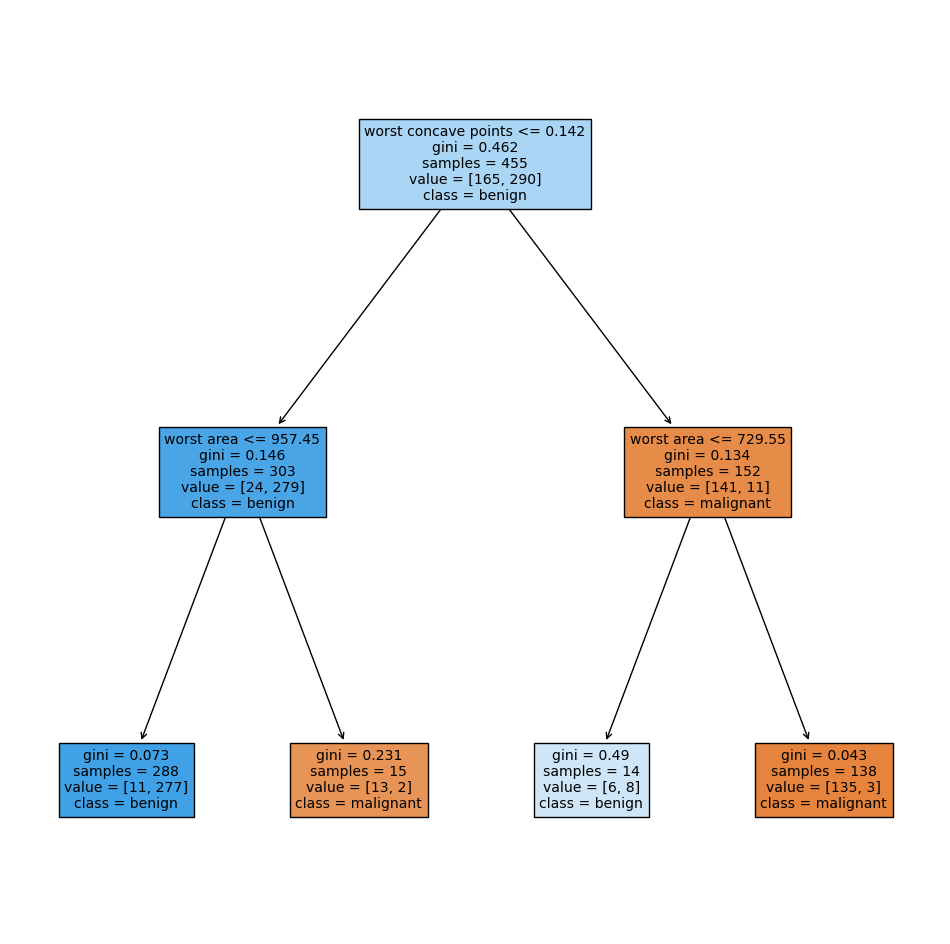

In [567]:
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
# data = load_iris()
X = data.data
y = data.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

from sklearn import tree
import matplotlib.pyplot as plt

# we will use the clf model trained in the previous code snippet
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names, ax=ax)
plt.show()



## Побудова дерев рішень

Процес побудови дерева рішень починається з набору даних. Набір даних містить ознаки, які є вхідними для моделі, а також цільову змінну, яка є вихідним результатом. Алгоритм дерева рішень намагається встановити зв'язки між ознаками та цільовою змінною і представляє їх у вигляді дерева.

Ось крок за кроком керівництво з побудови дерев рішень:

1. **Початок з кореня:** Корінь дерева представляє весь набір даних.

2. **Розділення даних:** Алгоритм вибирає найкращу ознаку для розділення даних на піднабори. "Найкраща" ознака - це та, при якій розділеними за цією ознакою піднаборами стають якомога більш чистими.

3. **Рекурсія на піднаборах:** Тепер алгоритм розглядає кожний піднабір як нову задачу і знову починає з кроку 2. Це рекурсивний характер алгоритму.

4. **Зупинка:** Алгоритм зупиняється для піднабору, якщо всі дані у піднаборі мають однакове значення цільової змінної, або якщо закінчились ознаки для розділення.

Цей процес "розділити і панувати" триває, доки алгоритм не створить дерево, яке може передбачати значення цільової змінної для кожного запису в наборі даних.

# **Метрики розділення вибірки**
Існує кілька критеріїв, за допомогою яких можна оцінити якість розділення вузлів дерева рішень:

- **Коефіцієнт Джині (Gini Impurity):** вимірює, наскільки часто випадково вибраний елемент з набору буде неправильно віднесений до свого класу, якщо вибрати два елементи з набору з різними мітками класу. **Чим менший коефіцієнт Джині, тим краще розділення.**
- **Ентропійний критерій (Entropy):** вимірює кількість інформації, яку містить даний набір даних. **Якщо розділення вузлів дерева рішень зменшує ентропію, то воно вважається кращим.**
- **Помилка класифікації (Misclassification Error):** вимірює частку помилок класифікації при визначенні класу набору даних. Цей критерій простий в застосуванні, але не є дуже чутливим до змін в даних.


# **Коефіцієнт Джині (Gini Impurity)**

**Коефіцієнт Джині (Gini Impurity)** - це міра невпорядкованості даних у вузлі дерева рішень. Вона вимірює, наскільки часто випадково вибраний елемент з набору буде неправильно віднесений до свого класу, якщо вибрати два елементи з набору з різними мітками класу.

**Щоб розрахувати коефіцієнт Джині для певного вузла дерева, необхідно виконати такі дії:**

1. Розділити дані вузла на дві групи відносно значення певної ознаки (атрибута).
2. Розрахувати коефіцієнт Джині для кожної з двох отриманих груп, тобто для кожного листка.
3. Взяти зважену суму коефіцієнтів Джині двох груп, де вагою є кількість прикладів у кожній з них відносно загальної кількості прикладів у вузлі.

Отриманий результат - це значення коефіцієнта Джині для даного вузла дерева.

**Формула для розрахунку коефіцієнта Джині** для кожного з листків даного пенька (дерева лише з кореневим вузлом та двома листками) з двома класами виглядає так:

$$Gini \ leaf = 1 - (p_0^2) - (p_1^2)$$

де p_0 та p_1 - це ймовірності віднесення прикладу до класу 0 та класу 1 відповідно, і задовольняють умову: p_0 + p_1 = 1.

Таким чином, **коефіцієнт Джині приймає значення від 0 до 0.5**, де 0 означає, що вузол містить приклади тільки одного класу, а 0.5 означає, що вузол містить однакову кількість прикладів двох різних класів. Чим менший коефіцієнт Джині, тим краще розділення вузлів на дві групи.

**Коефіцієнт Джині для вузла буде зваженою сумою коефіцієнтів для кожного з його листків:**

$$Gini \ node = (n_{left} / n) * Gini \ leaf_{left} + (n_{right} / n) * Gini \ leaf_{right}$$

де:
- $n_left$ - кількість прикладів у лівому листку,
- $n_right$ - у правому листку,
- $n$ - загальна кількість прикладів у початковій вибірці.

Отже, **чим менший коефіцієнт Джині, тим краще даний вузол розділяє наші дані**, таким чином ми визначаємо кореневий вузол, і послідовність всіх наступних вузлів.

In [570]:
df_x = pd.DataFrame(X, columns=data.feature_names)
df_y = pd.DataFrame(y, columns=["target"])

In [571]:
class_value_counts = df_y.value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')
print()

class_value_percent = df_y.value_counts(normalize=True)
print(f'Percent of samples in each class is:\n{class_value_percent}')
print()

quadratic_percent = class_value_percent ** 2
print(f'Quadratic percent of samples in each class is:\n{quadratic_percent}')
print()

gini = 1 - quadratic_percent.sum()
print(f'Gini: {gini}')


Number of samples in each class is:
target
1         357
0         212
dtype: int64

Percent of samples in each class is:
target
1         0.627417
0         0.372583
dtype: float64

Quadratic percent of samples in each class is:
target
1         0.393651
0         0.138818
dtype: float64

Gini: 0.4675300607546925


In [572]:
def gini_leaf(leaf_y):
  gini = 1 - (leaf_y.value_counts(normalize=True) ** 2).sum()
  return gini

gini_class = gini_leaf(df_y)
print(f'\nGini Impurity of the class is {gini_class:.3f}')


Gini Impurity of the class is 0.468


In [573]:
parent = df_y.values
left_child = df_y[X[:,0] >= X[:,0].mean()]
right_child = df_y[X[:,0] < X[:,0].mean()]

size_p = len(parent)
size_l = len(left_child)
size_r = len(right_child)

fraction_l = size_l / size_p
fraction_r = size_r / size_p

gini_node_value = (fraction_l * gini_leaf(left_child) + fraction_r * gini_leaf(right_child))
gini_node_value


0.23076184675243638

In [574]:
def gini_node(parent, left_child, right_child):
  size_p = len(parent)
  size_l = len(left_child)
  size_r = len(right_child)

  fraction_l = size_l / size_p
  fraction_r = size_r / size_p

  gini_node_value = (fraction_l * gini_leaf(left_child) + fraction_r * gini_leaf(right_child))

  return gini_node_value


In [575]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df_x_norm = pd.DataFrame(mms.fit_transform(df_x), columns=df_x.columns) * 100

df_gini = pd.DataFrame()

for column in df_x_norm.columns:
  ginis = []
  for threshold in np.linspace(0, 100, 11):
    left_child = df_y[df_x_norm[column] >= threshold]
    right_child = df_y[df_x_norm[column] < threshold]
    gini_node_value = gini_node(df_y, left_child, right_child)
    ginis.append(gini_node_value)
  df_gini[column] = ginis


In [577]:
# df_gini

In [226]:
import plotly.express as px

df_gini_sort = df_gini.min(axis=0).rename("gini").reset_index().sort_values(by="gini", ascending=True)

fig = px.bar(df_gini_sort, x='index', y='gini')
fig.show()

best_feature = df_gini_sort.iloc[0,0]
threshold = df_gini[best_feature].idxmin(axis=0)
df = pd.concat([df_x_norm, df_y], axis=1)
fig = px.scatter(df, x=df_gini_sort.iloc[0,0], y='target')
fig.add_vline(x=threshold*10)
fig.show()



# **Інформаційний Приріст (Ентропія)**

**Інформаційний приріст (Information Gain)** - це критерій, який використовується у деревах рішень для визначення того, яка ознака найбільше допоможе поділити дані на підмножини з різними значеннями цільової змінної.

Для розрахунку інформаційного приросту, спочатку потрібно обчислити ентропію для кожної ознаки. Ентропія - це міра невизначеності у системі. Чим менше невизначеності, тим менше ентропії.

Ентропія розраховується за формулою:

$$H(p_1) = -p_1 \log_2(p_1) - (1 - p_1) \log_2(1 - p_1)$$

де $p_i$ - це ймовірність того, що об'єкт належить класу $i$, тобто $p_0 + p_1 = 1$, тому $p_0 = 1 - p_1$, отже:

$$H(p_1) = -p_1 \log_2(p_1) - (1 - p_1) \log_2(1 - p_1)$$

Далі, обчисліть ентропію для кожної ознаки $A$ як зважений середній ентропії по всіх можливих значеннях ознаки:

$$H(A) = \sum_{v=1}^{V} \left( \frac{|S_v|}{|S|} \right) \cdot H(S_v)$$

де $V$ - це кількість можливих значень ознаки $A$, $S_v$ - це підмножина вибірки, в якій ознака $A$ має значення $v$, $|S_v|$ - кількість об'єктів у підмножині $S_v$, а $|S|$ - загальна кількість об'єктів у вибірці.

Завершується розрахунок інформаційного приросту для ознаки $A$ різницею між початковою ентропією і ентропією після поділу вибірки за ознакою $A$:

$$IG(A) = H(T) - H(A)$$

In [268]:
entropy_value = -1 * np.sum(df_y.value_counts(normalize=True) * np.log(df_y.value_counts(normalize=True)))

print(f"Entropy: {entropy_value}")


Entropy: 0.6603163491952275


In [584]:
def entropy_leaf(df_y):
  entropy_value = -1 * np.sum(df_y.value_counts(normalize=True) * np.log(df_y.value_counts(normalize=True)))
  return entropy_value

print(f"Entropy: {entropy_leaf(df_y)}")


Entropy: 0.6603163491952275


In [586]:
parent = df_y.values
left_child = df_y[X[:,0] >= X[:,0].mean()]
right_child = df_y[X[:,0] < X[:,0].mean()]

size_p = len(parent)
size_l = len(left_child)
size_r = len(right_child)

fraction_l = size_l / size_p
fraction_r = size_r / size_p

entropy_node_value = (fraction_l * entropy_leaf(left_child) + fraction_r * entropy_leaf(right_child))
gain = entropy_leaf(df_y) - entropy_node_value
print("Gain: ", gain)
print("Entropy: ", entropy_node_value)


Gain:  0.2727002310275919
Entropy:  0.38761611816763564


In [249]:
def entropy_node(parent, left_child, right_child):
  size_p = len(parent)
  size_l = len(left_child)
  size_r = len(right_child)

  fraction_l = size_l / size_p
  fraction_r = size_r / size_p

  entropy_node_value = (fraction_l * entropy_leaf(left_child) + fraction_r * entropy_leaf(right_child))

  return entropy_node_value

entropy_node_value = entropy_node(parent, left_child, right_child)
entropy_node_value


0.38761611816763564

In [594]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df_x_norm = pd.DataFrame(mms.fit_transform(df_x), columns=df_x.columns) * 100

df_entropy = pd.DataFrame()

for column in df_x_norm.columns:
  entropies = []
  for threshold in np.linspace(0, 100, 11):
    left_child = df_y[df_x_norm[column] >= threshold]
    right_child = df_y[df_x_norm[column] < threshold]
    entropy_node_value = entropy_node(df_y, left_child, right_child)
    # info_gain = entropy_leaf(df_y) - entropy_node_value
    entropies.append(entropy_node_value)
  df_entropy[column] = entropies

In [595]:
import plotly.express as px

df_entropy_sort = df_entropy.min(axis=0).rename("entropy").reset_index().sort_values(by="entropy", ascending=True)

fig = px.bar(df_entropy_sort, x='index', y='entropy')
fig.show()

best_feature = df_entropy_sort.iloc[0,0]
threshold = df_entropy[best_feature].idxmin(axis=0)
df = pd.concat([df_x_norm, df_y], axis=1)
fig = px.scatter(df, x=df_entropy_sort.iloc[0,0], y='target', title=f"Threshold: {threshold*10}")
fig.add_vline(x=threshold*10)
fig.show()



# **Помилка класифікації (Misclassification Error)**

**Помилка класифікації** є іншою метрикою, яка використовується для оцінки якості розбиття в дереві рішень. На відміну від ентропії або коефіцієнта Джині, які вимірюють невпорядкованість або нечистоту даних, помилка класифікації просто представляє частку екземплярів, які не були класифіковані правильно після розбиття.

Формально, для набору екземплярів з $k$ класами та пропорціями $p_1, p_2, \ldots, p_k$ екземплярів у кожному класі, помилка класифікації набору визначається як:

$$Error = 1 - \max(p_1, p_2, \ldots, p_k)$$

Для бінарної задачі класифікації це спрощується до $Error = 1 - \max(p, 1 - p)$, де $p$ - це пропорція екземплярів у одному з класів.

Ось як ви можете змінити код для обчислення помилки класифікації замість ентропії:



In [598]:
def error_leaf(df_y):
    if len(df_y) == 0:
        return 0
    else:
        proportions = df_y.value_counts(normalize=True)
        return 1 - max(proportions)

print(f"Error: {error_leaf(df_y)}")
df_y.value_counts(normalize=True)

Error: 0.37258347978910367


target
1         0.627417
0         0.372583
dtype: float64

In [599]:
def error_node(parent, left_child, right_child):
    size_p = len(parent)
    size_l = len(left_child)
    size_r = len(right_child)

    fraction_l = size_l / size_p
    fraction_r = size_r / size_p

    error_node_value = (fraction_l * error_leaf(left_child) + fraction_r * error_leaf(right_child))

    return error_node_value

parent = df_y.values
left_child = df_y[X[:,0] >= X[:,0].mean()]
right_child = df_y[X[:,0] < X[:,0].mean()]

error_node_value = error_node(parent, left_child, right_child)
error_node_value


0.13708260105448156

In [600]:
df_error = pd.DataFrame()

for column in df_x_norm.columns:
    errors = []
    for threshold in np.linspace(0, 100, 11):
        left_child = df_y[df_x_norm[column] >= threshold]
        right_child = df_y[df_x_norm[column] < threshold]
        error_node_value = error_node(df_y, left_child, right_child)
        errors.append(error_node_value)
    df_error[column] = errors


In [601]:
import plotly.express as px

df_error_sort = df_error.min(axis=0).rename("error").reset_index().sort_values(by="error", ascending=True)

fig = px.bar(df_error_sort, x='index', y='error')
fig.show()

best_feature = df_error_sort.iloc[0, 0]
threshold = df_error[best_feature].idxmin(axis=0)
df = pd.concat([df_x_norm, df_y], axis=1)

fig = px.scatter(df, x=best_feature, y='target', title=f"Misclassification Error - Threshold: {threshold*10}")
fig.add_vline(x=threshold*10)
fig.show()


## Перенавчання в деревах рішень

Хоча дерева рішень є потужним інструментом, вони мають один великий недолік: перенавчання. Перенавчання відбувається, коли модель навчається занадто добре на тренувальних даних. Замість того, щоб навчатися загальним закономірностям, вона запам'ятовує тренувальний набір, включаючи шум та викиди. В результаті модель показує поганий результат на нових даних.

Дерева рішень особливо схильні до перенавчання, оскільки вони можуть продовжувати робити розділення, поки не вдасться ідеально класифікувати всі зразки, що може включати в себе запам'ятовування шуму в даних.

Щоб запобігти перенавчанню, можна виконати один з таких кроків:

1. **Попереднє обмеження (прунінг, pre-pruning):** Це включає встановлення обмежень для дерева до його побудови. Ці обмеження можуть включати встановлення максимальної глибини дерева, максимальної кількості листків або мінімальної кількості прикладів, необхідних для розділення внутрішнього вузла.

2. **Післяпобудовне обмеження (пост-прунінг, post-pruning):** Це включає побудову дерева спочатку, а потім видалення вузлів, які містять мало інформації. Існує кілька стратегій для визначення, які вузли слід обрізати, такі як зменшення помилок обрізання, обрізання за складністю вартості або обрізання за найслабшим зв'язком.

У бібліотеці scikit-learn ви можете виконати попереднє обмеження дерева, встановивши параметри, такі як `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_leaf_nodes` та інші.

Accuracy (Pruned): 0.9210526315789473


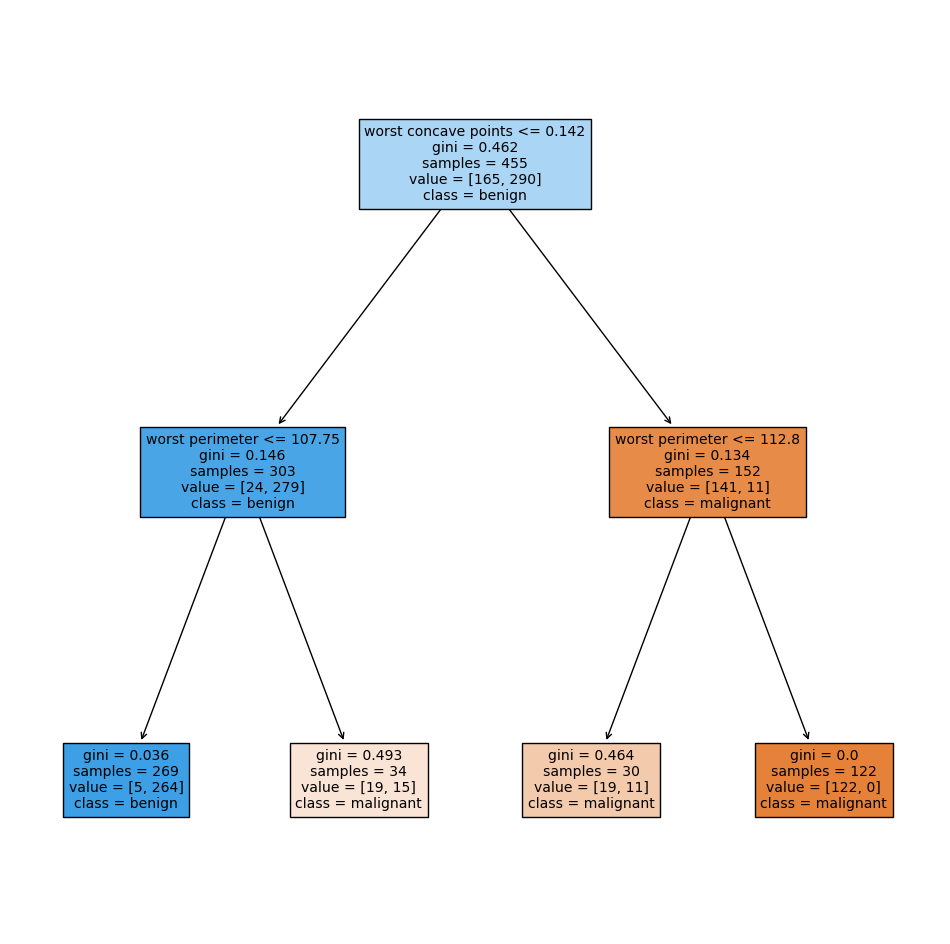

In [607]:
# train a decision tree classifier with pre-pruning
clf_pruned = DecisionTreeClassifier(max_depth=2, min_samples_leaf=20, min_samples_split=50)
clf_pruned.fit(X_train, y_train)

# make predictions on the test set
y_pred_pruned = clf_pruned.predict(X_test)

# compute the accuracy of the model
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f'Accuracy (Pruned): {accuracy_pruned}')

# plot the pruned tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf_pruned, filled=True, feature_names=data.feature_names, class_names=data.target_names, ax=ax)
plt.savefig("tree.png")
plt.show()


## Ансамбль-методи

Ансамбль-методи, до яких належать Випадкові ліси, Градієнтний бустинг та інші, - це методи машинного навчання, які поєднують декілька моделей для покращення їх продуктивності. Ці методи можуть зменшити перенавчання, враховуючи усереднення прогнозів кількох дерев рішень, що призводить до моделі з меншою дисперсією та, можливо, меншим зміщенням.

### Випадкові ліси

Випадковий ліс - це колекція дерев рішень, які незалежно навчаються на різних підмножинах даних. Підмножини створюються шляхом випадкового вибіркового заміщення даних, процесу, відомого як бутстрепінг. Крім того, при навчанні кожного дерева на кожному розгалуженні враховується випадковий підмножина ознак.

Остаточний прогноз Випадкового лісу - це середнє прогнозів всіх дерев для задач регресії або більшість голосів для класифікації.

### Градієнтний бустинг

Градієнтний бустинг - це ще один ансамбль-метод, який поєднує слабкі моделі в одну потужну модель. Однак, замість того, щоб навчати всі моделі незалежно і паралельно (як Випадковий ліс), Градієнтний бустинг навчає моделі послідовно, при цьому кожна нова модель навчається виправляти помилки, допущені попередніми.

Цей підхід використовує градієнтний спуск для знаходження оптимальних ваг моделей, збільшуючи послідовно їх числові значення, щоб зменшити помилки на кожному кроці. Градієнтний бустинг дозволяє побудувати дуже потужні моделі, які зазвичай працюють добре навіть на складних завданнях машинного навчання.

In [287]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# train a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(X_train, y_train)

# make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

# compute the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy (Random Forest): {accuracy_rf}')

# train a gradient boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb_clf.fit(X_train, y_train)

# make predictions on the test set
y_pred_gb = gb_clf.predict(X_test)

# compute the accuracy of the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy (Gradient Boosting): {accuracy_gb}')


Accuracy (Random Forest): 0.9649122807017544
Accuracy (Gradient Boosting): 0.9649122807017544


## Переваги та недоліки

### Переваги

1. **Інтерпретованість:** Дерева рішень - одні з найпростіших алгоритмів для інтерпретації. Вони інтуїтивні, і їх рішення легко візуалізувати у вигляді дерев'яних діаграм.

2. **Мінімальна підготовка даних:** Дерева рішень потребують відносно невеликої підготовки даних. Вони не настільки чутливі до викидів та відсутніх значень, як деякі інші алгоритми.

3. **Обробка числових та категоріальних даних:** Дерева рішень можуть обробляти як числові, так і категоріальні дані.

### Недоліки

1. **Перенавчання:** Дерева рішень легко перенавчаються на дані, запам'ятовуючи шум у даних.

2. **Дисперсія:** Дерева рішень мають високу дисперсію, що означає, що якщо ми випадковим чином розділити дані на дві частини, то отримаємо два дуже різних дерева.

3. **Зміщеність:** Дерева рішень спрямовані на ознаки з більшою кількістю рівнів. Тобто, ознака з великою кількістю рівнів має кращий шанс вплинути на дерево, ніж ознака з меншою кількістю рівнів.

### Ансамбль-методи

Ансамбль-методи, такі як Випадкові ліси та Градієнтний бустинг, можуть пом'якшити деякі недоліки дерев рішень, зокрема перенавчання та дисперсію. Однак вони більш складні, вимагають більше обчислювальних ресурсів і менш інтерпретовані, ніж окреме дерево рішень.

# Висновок

Цим завершується наше дослідження дерев рішень та ансамбль-методів. Незважаючи на їх переваги та недоліки, вони є потужними інструментами у наборі засобів машинного навчання. Вони широко використовуються на практиці завдяки своїй універсальності та продуктивності.

Пам'ятайте, що успішне машинне навчання полягає у розумінні алгоритмів, якими ви користуєтеся, і у вмінні їх використовувати та знаходити найкращий час для їх застосування.

1. **Table of Hyperparameters for Decision Tree:**

| Hyperparameter    | Explanation and Importance                                                                                               | Best Starting Value | Influence on Underfitting/Overfitting |
|-------------------|---------------------------------------------------------------------------------------------------------------------------|---------------------|-------------------------------------|
| criterion         | The function to measure the quality of a split. It can be "gini" for Gini impurity or "entropy" for information gain.   | "gini" or "entropy" | None |
| max_depth         | The maximum depth of the tree.                                                                                           | None                | Higher values can lead to overfitting|
| min_samples_split | The minimum number of samples required to split an internal node.                                                       | 2                   | Higher values can prevent overfitting|
| min_samples_leaf  | The minimum number of samples required to be at a leaf node.                                                             | 1                   | Higher values can prevent overfitting|
| max_features      | The number of features to consider when looking for the best split.                                                     | None                | Higher values may lead to overfitting|


In [635]:
# Import required libraries
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

data = load_breast_cancer()
# data = load_iris()
X = data.data
y = data.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=0)


In [636]:
# import sklearn
# sklearn.metrics.get_scorer_names()

In [637]:
# Define hyperparameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Perform GridSearch to find the best hyperparameters
grid_search = GridSearchCV(dt_classifier, param_grid, cv=10, scoring='f1')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [638]:
pd.DataFrame(grid_search.cv_results_["params"]).head()

,criterion,max_depth,max_features,min_samples_leaf,min_samples_split
0,gini,NaN,None,1,2
1,gini,NaN,None,1,5
2,gini,NaN,None,1,10
3,gini,NaN,None,2,2
4,gini,NaN,None,2,5


In [639]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the results of GridSearch
results = grid_search.cv_results_

# Extract relevant data for visualization
hyperparams = pd.DataFrame(results['params'])
# hyperparams.max_depth = hyperparams.max_depth.fillna(-1)
f1_scores = pd.DataFrame(results['mean_test_score'], columns=["f1_score_mean"])

# Create a DataFrame with hyperparameter combinations and F1 scores
df_results = pd.concat([hyperparams, f1_scores], axis=1)

display(df_results.sort_values(by=["f1_score_mean"], ascending=False).head())

for col in hyperparams.columns:
  # Create heatmap
  fig = px.box(df_results, x=col, y="f1_score_mean")
  fig.show()





,criterion,max_depth,max_features,min_samples_leaf,min_samples_split,f1_score_mean
119,entropy,5.0,sqrt,1,10,0.958053
122,entropy,5.0,sqrt,2,10,0.958053
78,gini,10.0,log2,4,2,0.956653
79,gini,10.0,log2,4,5,0.956653
25,gini,NaN,log2,4,5,0.956653


In [640]:
# Get the best hyperparameters
best_params = grid_search.best_params_

best_params

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10}

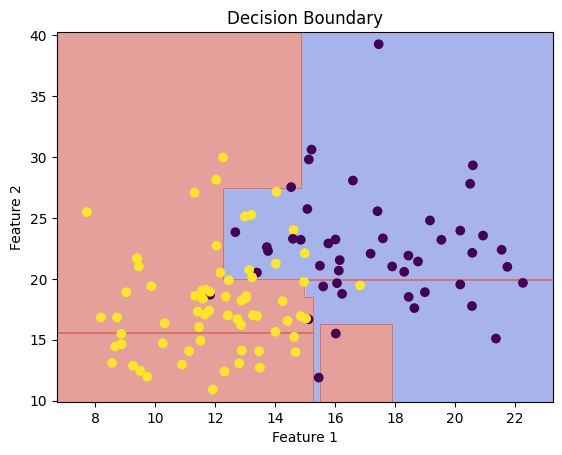

In [641]:
import matplotlib.pyplot as plt
import numpy as np

# Fit the classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=0)
best_dt_classifier.fit(X_train[:,:2], y_train)

# Plot decision boundary to showcase underfitting/overfitting
def plot_decision_boundary(classifier, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Plot decision boundary for the best classifier
plot_decision_boundary(best_dt_classifier, X_test, y_test)


In [648]:
df_ = df_results[~(df_results.max_depth.isnull())]
df_.max_depth = df_.max_depth.astype(int)

best_params_combinations = (df_
                            .sample(4)
                            .sort_values(by=["f1_score_mean"], ascending=False)
                            .iloc[:,:-1]
                            .reset_index(drop=True)
                            .to_dict(orient="index")
)



In [649]:
for params in best_params_combinations.values():
  print(params)


{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5}


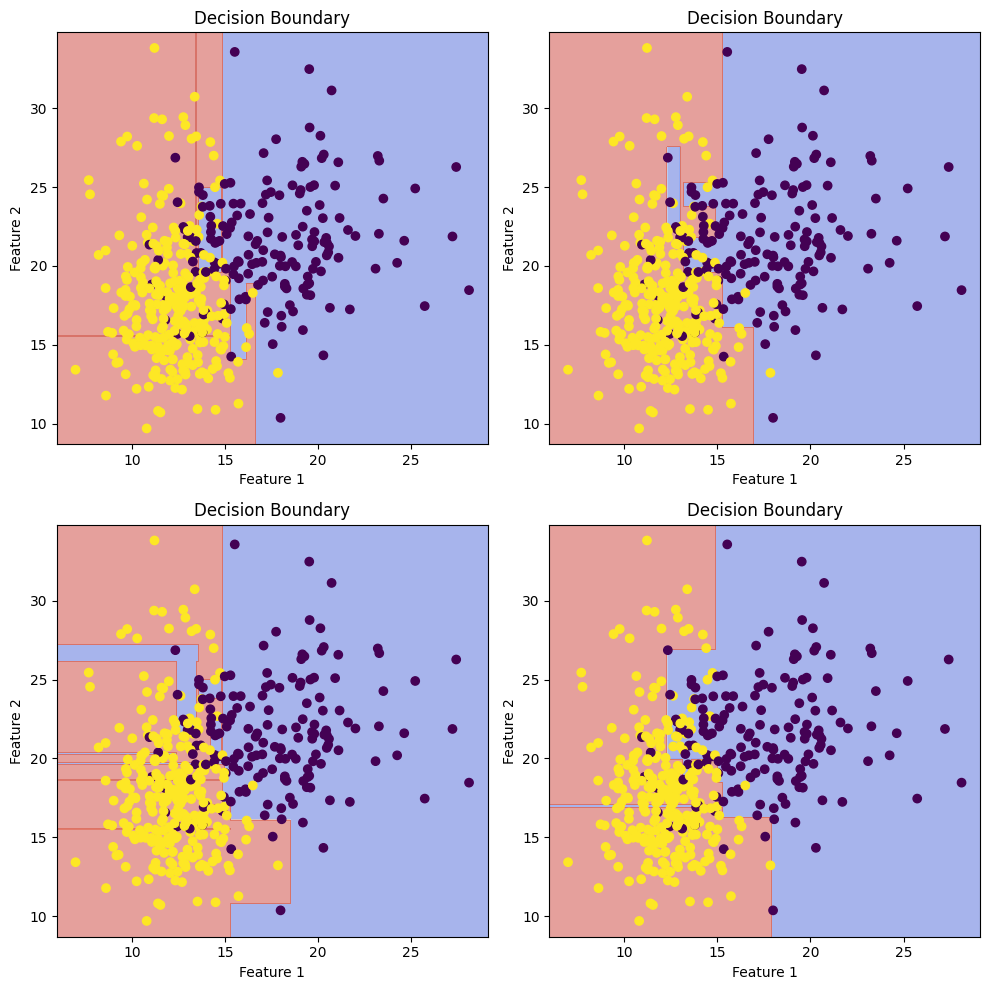

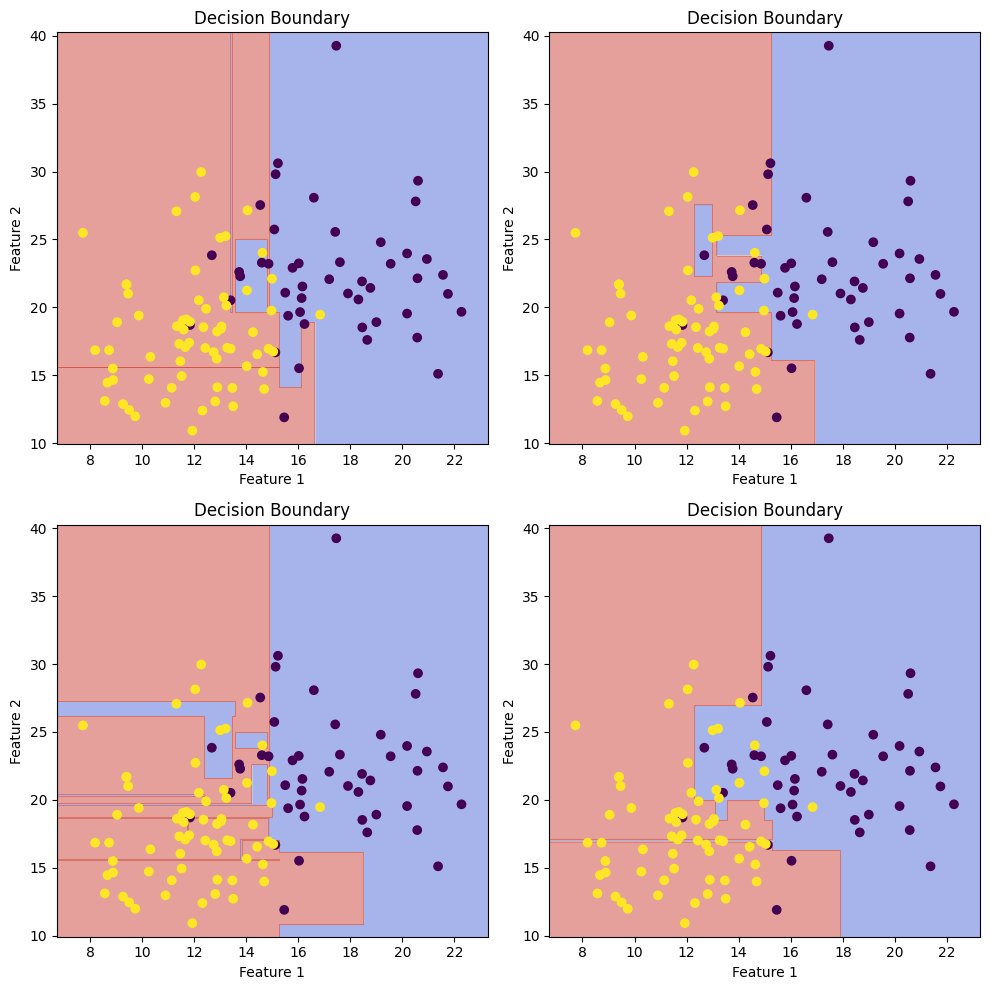

In [650]:
import matplotlib.pyplot as plt
import numpy as np

# Fit classifiers with the best hyperparameters
best_classifiers = [DecisionTreeClassifier(**params, random_state=0).fit(X_train[:,:2], y_train) for params in best_params_combinations.values()]

# Plot decision boundaries for the four best classifiers
def plot_decision_boundary(classifier, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plt.subplot(subplot)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

# Create a 2x2 grid for subplots
plt.figure(figsize=(10, 10))

# Plot decision boundaries for the four best classifiers
for i, classifier in enumerate(best_classifiers, 1):
    plt.subplot(2, 2, i)
    plot_decision_boundary(classifier, X_train, y_train)

plt.tight_layout()
plt.show()

# Create a 2x2 grid for subplots
plt.figure(figsize=(10, 10))

# Plot decision boundaries for the four best classifiers
for i, classifier in enumerate(best_classifiers, 1):
    plt.subplot(2, 2, i)
    plot_decision_boundary(classifier, X_test, y_test)

plt.tight_layout()
plt.show()



# **Випадковий Ліс (Random Forest) (Bagging)**

![image](https://av-eks-blogoptimized.s3.amazonaws.com/33019random-forest-algorithm287548.png)

**1. Пояснення Випадкового Лісу**

Випадковий Ліс - це метод навчання ансамблю, який поєднує кілька дерев рішень для створення більш точної та надійної прогнозної моделі. Він був розроблений для подолання обмежень окремих дерев рішень і поліпшення їх продуктивності.

Основна причина виникнення Випадкового Лісу полягає в подоланні проблем високої варіантності (перенавчання) та впливу (недонавчання), пов'язаних з окремими деревами рішень. Одиночне дерево рішень може бути схильне до перенавчання, що означає, що воно запам'ятовує навчальні дані і погано справляється з новими, невидимими даними. З іншого боку, воно також може страждати від недонавчання, коли воно не вдається виявити основні закономірності в даних та дає неточні прогнози.

Випадковий Ліс вирішує ці проблеми, поєднувавши кілька дерев рішень через процес під назвою багінг (бутстреп-агрегація). Він будує кілька дерев за допомогою різних підвибірок навчальних даних та ознак, а потім об'єднує їх прогнози, щоб прийняти остаточне рішення. Цей підхід зменшує варіантність, що призводить до більш стабільних та точних прогнозів.

**2. Робота Випадкового Лісу з Візуалізацією**

Процес створення Випадкового Лісу можна проілюструвати з візуалізацією окремих дерев рішень та агрегацією їх прогнозів. Кожне дерево будується з використанням різних підвибірок даних та ознак, а остаточний прогноз отримується шляхом голосування за більшість або усереднення.

**3. Гіперпараметри для Випадкового Лісу та їх Вплив**

Ось таблиця важливих гіперпараметрів для Випадкового Лісу разом з їх поясненням та впливом на перенавчання/недонавчання:

| Гіперпараметр         | Пояснення                                              | Найкраще Початкове Значення | Вплив на Перенавчання/Недонавчання                  |
|-----------------------|--------------------------------------------------------|----------------------------|---------------------------------------------------|
| n_estimators         | Кількість дерев рішень у лісі                         | 100                        | Більше дерев зменшує перенавчання та збільшує стабільність |
| max_depth            | Максимальна глибина кожного дерева рішень             | None (Необмежено)          | Глибші дерева можуть призвести до перенавчання      |
| min_samples_split    | Мінімальна кількість вибірок для розбиття вузла       | 2                          | Вищі значення запобігають перенавчанню              |
| min_samples_leaf     | Мінімальна кількість вибірок у листі                  | 1                          | Вищі значення запобігають перенавчанню              |
| max_features         | Максимальна кількість ознак для розбиття              | "auto" (sqrt)              | Нижчі значення зменшують перенавчання               |

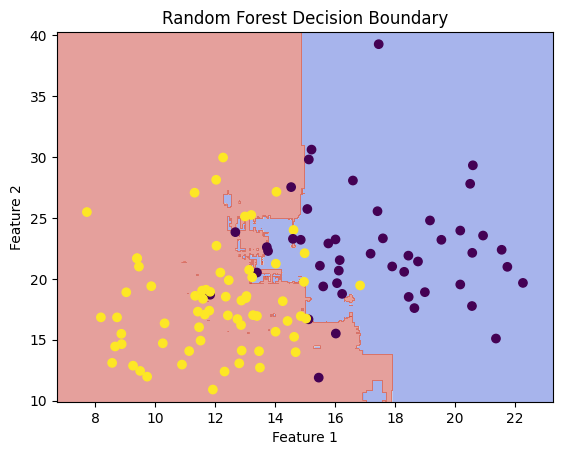

In [652]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

# Fit the model to the training data
rf_classifier.fit(X_train[:,:2], y_train)

# Plot decision boundary for the Random Forest Classifier
def plot_decision_boundary(classifier, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Random Forest Decision Boundary')
    plt.show()

# Plot decision boundary for the Random Forest Classifier
plot_decision_boundary(rf_classifier, X_test, y_test)


In [395]:
import warnings
warnings.filterwarnings("ignore")

In [656]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Perform GridSearch to find the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_params

{'max_depth': 5, 'n_estimators': 100}

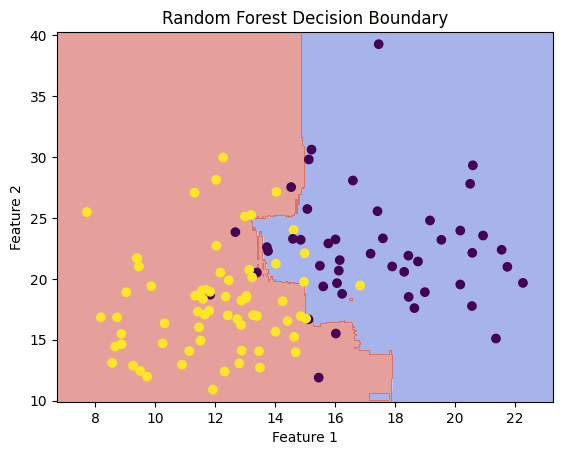

In [655]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(**best_params)

# Fit the model to the training data
rf_classifier.fit(X_train[:,:2], y_train)

# Plot decision boundary for the Random Forest Classifier
def plot_decision_boundary(classifier, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Random Forest Decision Boundary')
    plt.show()

# Plot decision boundary for the Random Forest Classifier
plot_decision_boundary(rf_classifier, X_test, y_test)

In [409]:
rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

0.9934065934065934 0.9473684210526315


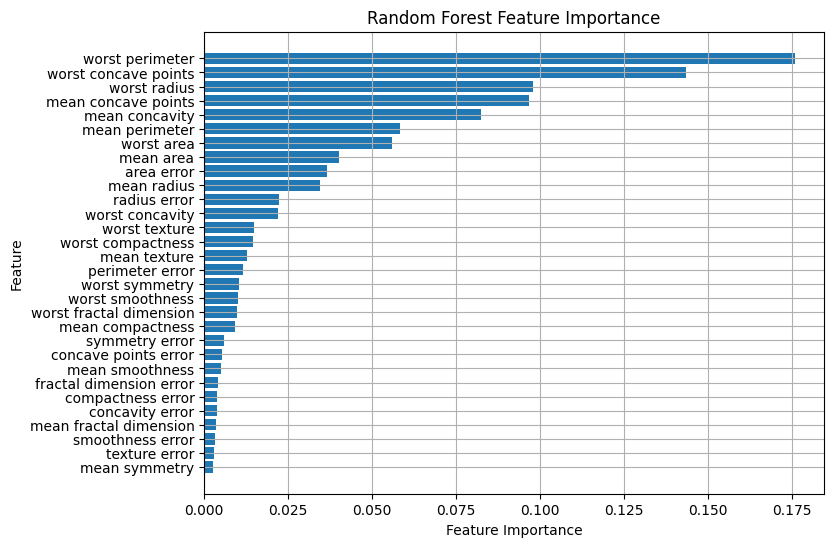

In [657]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(**best_params, random_state=0)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)
tr_score = rf_classifier.score(X_train, y_train)
te_score = rf_classifier.score(X_test, y_test)
print(tr_score, te_score)


# Get feature importances
feature_importances = rf_classifier.feature_importances_
feature_importances_df = pd.DataFrame({'features': df_x.columns, "importance": feature_importances})
feature_importances_df = feature_importances_df.sort_values(by=["importance"], ascending=True)

# Plot feature importances as a bar plot
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importances_df["importance"])), feature_importances_df["importance"], align='center')
plt.yticks(range(len(feature_importances_df["importance"])), feature_importances_df["features"].tolist())
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.grid()
plt.title('Random Forest Feature Importance')
plt.show()

In [670]:
i = 8
best_features = list(feature_importances_df.iloc[-i:].index)
best_features

[3, 23, 2, 6, 7, 20, 27, 22]

0.989010989010989 0.9736842105263158


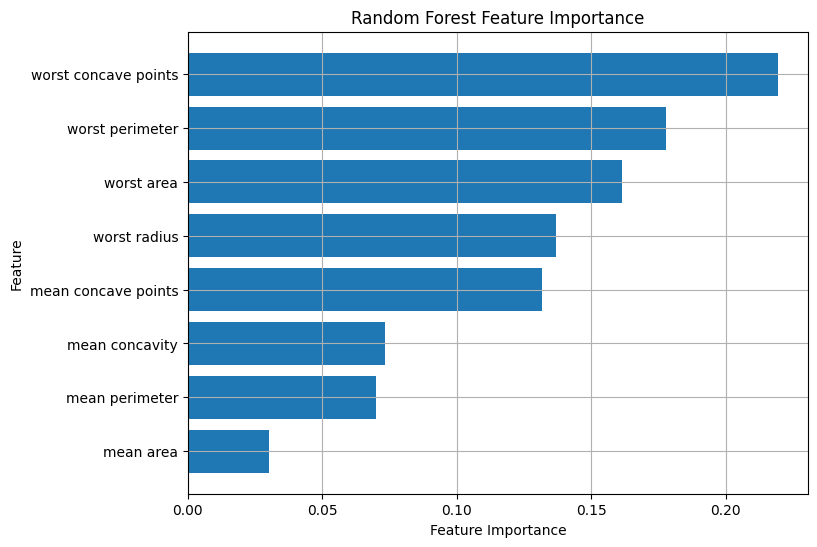

In [671]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(**best_params, random_state=0)

# Fit the model to the training data
rf_classifier.fit(X_train[:, best_features], y_train)
tr_score = rf_classifier.score(X_train[:, best_features], y_train)
te_score = rf_classifier.score(X_test[:, best_features], y_test)
print(tr_score, te_score)

# Get feature importances
feature_importances_2 = rf_classifier.feature_importances_
feature_importances_df_2 = pd.DataFrame({'features': feature_importances_df.iloc[-i:]["features"], "importance": feature_importances_2})
feature_importances_df_2 = feature_importances_df_2.sort_values(by=["importance"], ascending=True)

# Plot feature importances as a bar plot
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importances_df_2["importance"])), feature_importances_df_2["importance"], align='center')
plt.yticks(range(len(feature_importances_df_2["importance"])), feature_importances_df_2["features"].tolist())
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.grid()
plt.title('Random Forest Feature Importance')
plt.show()

# **Градієнтний Бустінг (Gradient Boosting)**

![image](https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-3-030-34482-5_25/MediaObjects/482246_1_En_25_Fig2_HTML.png)

![image](https://editor.analyticsvidhya.com/uploads/73483image2.png)

![image](https://media.geeksforgeeks.org/wp-content/uploads/20200721214745/gradientboosting.PNG)

![image](https://affine.ai/wp-content/uploads/2022/01/144-1.png)

**1. Пояснення Градієнтного Бустінгу**

Градієнтний Бустінг є методом згортаного навчання, який комбінує кілька слабких моделей (зазвичай дерев рішень) для створення потужної прогнозної моделі. Він був розроблений як покращення простих дерев рішень з метою підвищення їх точності та надійності.

Основною мотивацією для появи Градієнтного Бустінгу є вирішення обмежень окремих слабких моделей та покращення їх продуктивності. Слабкі моделі - це моделі, які незначно перевищують випадкове вгадування, але вони недостатньо потужні, щоб зробити точні прогнози самостійно. Градієнтний Бустінг призначений для подолання цього недоліку та покращення загальної продуктивності шляхом послідовного додавання слабких моделей.

У Градієнтному Бустінгу кожна слабка модель навчається виправляти помилки, зроблені попередніми моделями. Моделі додаються одна за одною, і кожна наступна модель фокусується на помилках, зроблених її попередниками. Цей ітеративний процес триває, поки модель не збігається до кінцевого прогнозу.

**2. Як працює Градієнтний Бустінг з візуалізацією**

Процес побудови Градієнтного Бустінгу можна проілюструвати з візуалізацією послідовного додавання слабких моделей та поступове поліпшення продуктивності моделі. Кожна слабка модель побудована так, щоб виловлювати помилки, зроблені попередніми моделями, що призводить до більш точного та точного кінцевого прогнозу.

**3. Гіперпараметри для Градієнтного Бустінгу та їх вплив**

Тут наведена таблиця важливих гіперпараметрів для Градієнтного Бустінгу разом з їх поясненням та впливом на недостатність перенавчання / перевантаження:

| Гіперпараметр       | Пояснення                                               | Найкраще початкове значення | Вплив на недостатність перенавчання / перевантаження |
|---------------------|---------------------------------------------------------|----------------------------|---------------------------------------------------|
| n_estimators       | Кількість слабких моделей у наборі                      | 100                        | Більше моделей зменшують перенавчання та збільшують стабільність |
| learning_rate     | Крок, з яким модель адаптується до помилок              | 0.1                        | Менші значення зменшують перенавчання            |
| max_depth          | Максимальна глибина кожної слабкої моделі (дерева рішень) | 3                          | Глибші дерева можуть призвести до перенавчання   |
| min_samples_split | Мінімальна кількість вибірок для розбиття внутрішнього вузла | 2                          | Більші значення запобігають перенавчання         |
| min_samples_leaf  | Мінімальна кількість вибірок для листового вузла        | 1                          | Більші значення запобігають перенавчання         |
| subsample         | Дробова частина вибірок, використовуваних для навчання кожної слабкої моделі | 0.8 | Менші значення зменшують перенавчання           |
| max_features      | Максимальна кількість розглянутих ознак для розбиття    | "auto" (sqrt)              | Менші значення зменшують перенавчання           |

XGBoost (Extreme Gradient Boosting) - це оптимізована та ефективна реалізація алгоритму Gradient Boosting. Він використовує градієнтний бустінг для послідовного додавання слабких моделей (зазвичай дерев рішень) до ансамблю та здійснення прогнозів. Коефіцієнт навчання (learning rate) відіграє важливу роль у алгоритмі XGBoost.

**1. Формули XGBoost**

Давайте спершу визначимо деякі терміни, перш ніж перейти до формул:
- $y_i$ представляє цільову змінну (відповідь) для $i$-го спостереження в навчальних даних.
- $F(x_i)$ позначає прогноз моделі для $i$-го спостереження, де $x_i$ представляє вектор ознак для $i$-го спостереження.
- $L(y_i, F(x_i))$ - функція втрат, яка вимірює різницю між справжнім значенням цільової змінної $y_i$ та прогнозом моделі $F(x_i)$.
- $h(x_i)$ представляє прогноз поточного слабкого моделі (наприклад, дерева рішень) для $i$-го спостереження.

**Функція втрати XGBoost**

Функція втрати в XGBoost є сумою функції втрат та регуляризаційного члена:

$$ \text{Objective} = \sum_{i=1}^{n} L(y_i, F(x_i)) + \sum_{k=1}^{K} \Omega(f_k), $$

де:
- $n$ - кількість тренувальних прикладів.
- $K$ - кількість слабких моделей (наприклад, дерев рішень).
- $f_k$ - $k$-та слабка модель.
- $\Omega(f_k)$ - регуляризаційний член, який штрафує складні моделі для запобігання перенавчанню.

**Коефіцієнт навчання (Learning Rate)**

Коефіцієнт навчання (також відомий як скорочення або eta) - це гіперпараметр, позначений $\eta$. Він контролює розмір кроку, при якому алгоритм XGBoost адаптується до помилок, допущених слабкими моделями. Малий коефіцієнт навчання уповільнює процес навчання, дозволяючи моделі вносити невеликі корективи на кожній ітерації. Це може бути корисним, оскільки це може призвести до кращої збіжності та узагальнення.

Коефіцієнт навчання модифікує прогнози кожної слабкої моделі перед їх поєднанням з прогнозами ансамблю. Він використовується в наступній формул

і для оновлення прогнозів ансамблю:

$ F^{(t+1)}(x) = F^{(t)}(x) + \eta \cdot h(x), $

де:
- $F^{(t)}(x)$ - прогноз ансамблю для спостереження $x$ на ітерації $t$.
- $h(x)$ - прогноз поточної слабкої моделі для спостереження $x$.
- $\eta$ - коефіцієнт навчання.

Коефіцієнт навчання також виступає як механізм регуляризації. Зменшуючи внесок кожної слабкої моделі, він може запобігти перенавчанню ансамблю на тренувальних даних.

Підсумовуючи, коефіцієнт навчання контролює розмір кроку у процесі градієнтного бустінгу, що впливає на швидкість навчання та регуляризацію моделі. Малий коефіцієнт навчання може підвищити стабільність процесу навчання та покращити узагальнюючу здатність. Однак вибір відповідного значення коефіцієнта навчання є важливим, оскільки дуже мале значення може сповільнити збіжність, а дуже велике значення може призвести до недосягнення бажаної точності та поганого узагальнення. Тому налаштування коефіцієнта навчання є важливою частиною процесу налаштування гіперпараметрів XGBoost.

In [ ]:
# learning_rate = 0.1
# y = 10
# y^ = 8
# er= 2
# er^ = learning-rate * 1.5
# y^ + er^ = 8 + 0.1 * 1.5 -> 8.15
# er2 = er - er^ = 2 - 1.5 = 0.5



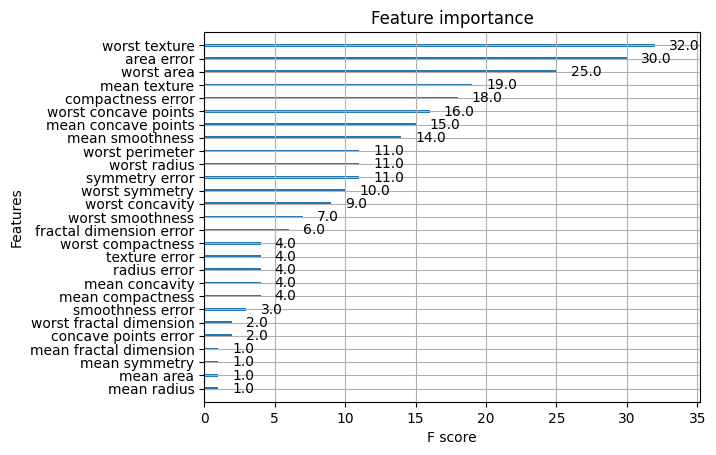

In [673]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create a Gradient Boosting model
gb_classifier = xgb.XGBClassifier()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)

# Fit the model on the training data
gb_classifier.fit(X_train, y_train)

# Plot feature importance
xgb.plot_importance(gb_classifier)
plt.show()


In [674]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 0.01],
}

# Create a Gradient Boosting classifier
gb_classifier = xgb.XGBClassifier()

# Perform GridSearch to find the best hyperparameters
grid_search = GridSearchCV(gb_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_


In [675]:
# Get the results of GridSearch
results = grid_search.cv_results_

# Extract relevant data for visualization
hyperparams = pd.DataFrame(results['params'])
f1_scores = pd.DataFrame(results['mean_test_score'], columns=["acc_mean"])

# Create a DataFrame with hyperparameter combinations and F1 scores
df_results = pd.concat([hyperparams, f1_scores], axis=1)

best_params_combinations = (df_results
                            .sample(4)
                            .sort_values(by=["acc_mean"], ascending=False)
                            .iloc[:,:-1]
                            .reset_index(drop=True)
                            .to_dict(orient="index")
)
best_params_combinations


{0: {'learning_rate': 0.1, 'n_estimators': 100},
 1: {'learning_rate': 0.1, 'n_estimators': 200},
 2: {'learning_rate': 0.01, 'n_estimators': 200},
 3: {'learning_rate': 0.01, 'n_estimators': 50}}

In [676]:
X = X_train.values
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

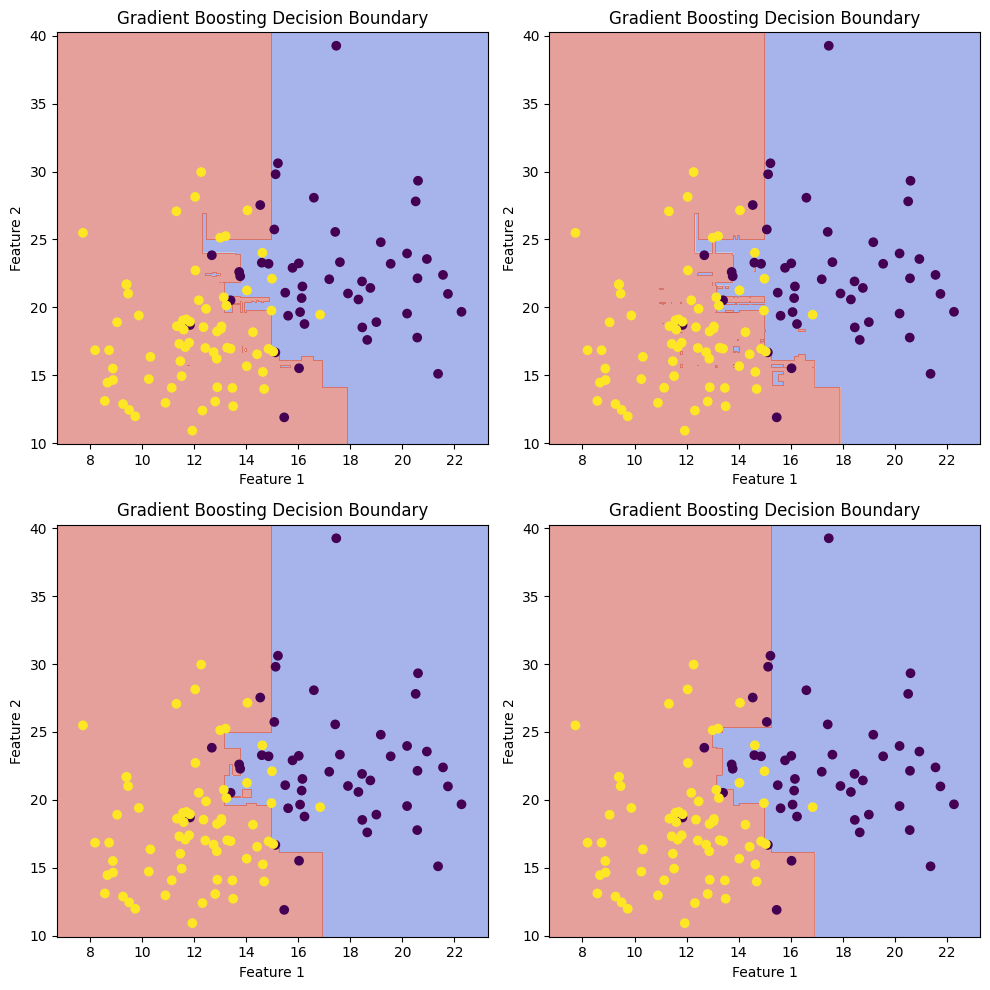

In [677]:
import plotly.graph_objects as go

# Plot decision boundary for the Random Forest Classifier
def plot_decision_boundary(classifier, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Gradient Boosting Decision Boundary')

# Create a 2x2 grid for subplots
plt.figure(figsize=(10, 10))

# Plot decision boundaries for different hyperparameters
for i, params in enumerate([best_params_combinations[0], best_params_combinations[1], best_params_combinations[2], best_params_combinations[3]]):
    plt.subplot(2, 2, i+1)
    gb_classifier = xgb.XGBClassifier(**params)
    gb_classifier.fit(X_train.values[:,:2], y_train.values)
    plot_decision_boundary(gb_classifier, X_test.values, y_test.values)

plt.tight_layout()
plt.show()


1.0 0.9649122807017544


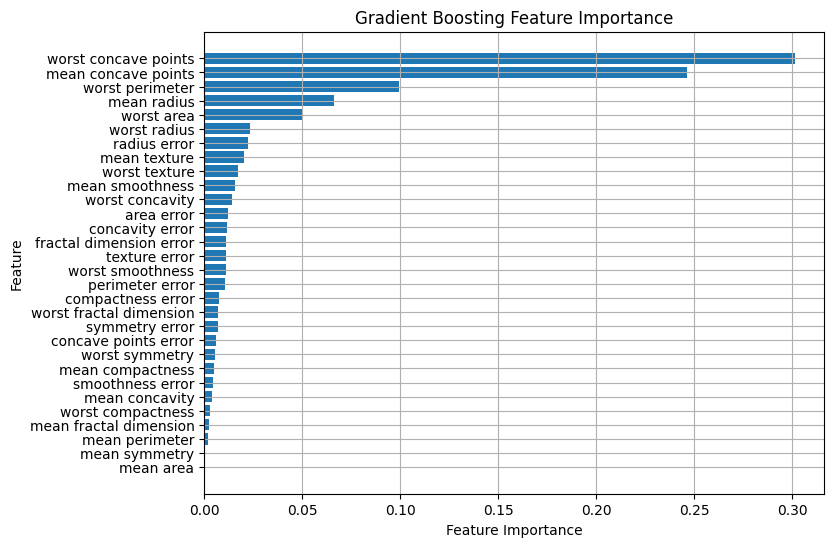

In [678]:
# Create a Random Forest Classifier
gb_classifier = xgb.XGBClassifier(**best_params, random_state=0)

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)
tr_score = gb_classifier.score(X_train, y_train)
te_score = gb_classifier.score(X_test, y_test)
print(tr_score, te_score)


# Get feature importances
feature_importances = gb_classifier.feature_importances_
feature_importances_df = pd.DataFrame({'features': df_x.columns, "importance": feature_importances})
feature_importances_df = feature_importances_df.sort_values(by=["importance"], ascending=True)

# Plot feature importances as a bar plot
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importances_df["importance"])), feature_importances_df["importance"], align='center')
plt.yticks(range(len(feature_importances_df["importance"])), feature_importances_df["features"].tolist())
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.grid()
plt.title('Gradient Boosting Feature Importance')
plt.show()

In [691]:
i = 5
best_features = list(feature_importances_df.iloc[-i:]["features"].tolist())
best_features

['worst area',
 'mean radius',
 'worst perimeter',
 'mean concave points',
 'worst concave points']

0.9978021978021978 0.9649122807017544


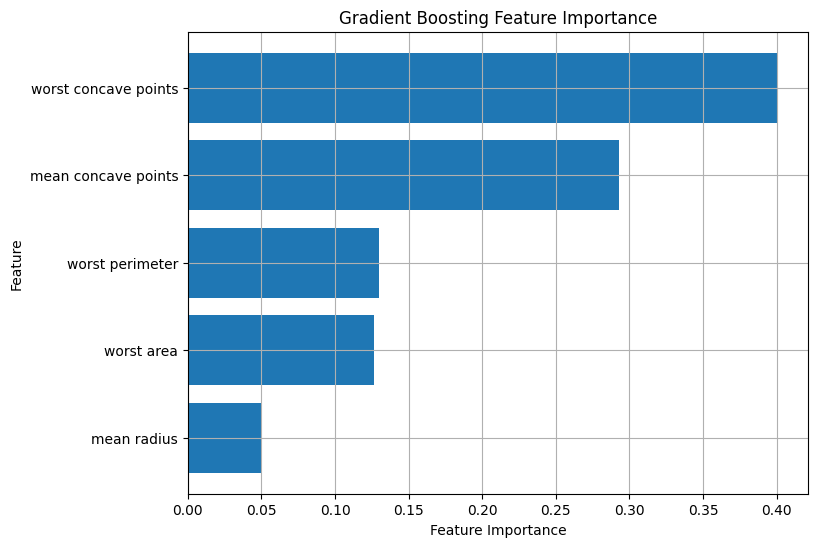

In [692]:
# Create a Random Forest Classifier
gb_classifier = xgb.XGBClassifier(**best_params, random_state=0)

# Fit the model to the training data
gb_classifier.fit(X_train[best_features], y_train)
tr_score = gb_classifier.score(X_train[best_features], y_train)
te_score = gb_classifier.score(X_test[best_features], y_test)
print(tr_score, te_score)

# Get feature importances
feature_importances_2 = gb_classifier.feature_importances_
feature_importances_df_2 = pd.DataFrame({'features': feature_importances_df.iloc[-i:]["features"], "importance": feature_importances_2})
feature_importances_df_2 = feature_importances_df_2.sort_values(by=["importance"], ascending=True)

# Plot feature importances as a bar plot
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importances_df_2["importance"])), feature_importances_df_2["importance"], align='center')
plt.yticks(range(len(feature_importances_df_2["importance"])), feature_importances_df_2["features"].tolist())
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.grid()
plt.title('Gradient Boosting Feature Importance')
plt.show()

# **kNN**

**k-Nearest Neighbors (kNN) - kНайближчих Сусідів**

![image](http://habrastorage.org/r/w1560/storage2/f6e/91d/bec/f6e91dbecf6e9b0e4a2f451941ca95ec.png)

![image](https://intuitivetutorial.com/wp-content/uploads/2023/04/knn-1.png)

![image](https://miro.medium.com/v2/resize:fit:1151/0*ItVKiyx2F3ZU8zV5)

![image](https://miro.medium.com/v2/resize:fit:990/1*3SwcOCUyVdGauhHrHvOaLA.png)

1. **Пояснення kNN**

k-Найближчих Сусідів (kNN) є алгоритмом класифікації та регресії, який використовує схожість з іншими точками даних для прогнозування значень. Головна ідея полягає в тому, що для прогнозу нового прикладу використовуються його k найбільш схожих прикладів з навчального набору даних.

Алгоритм kNN з'явився для вирішення завдань класифікації та регресії, де близькість між прикладами відіграє важливу роль. Він здатний здійснювати прогнози для нових даних на основі інформації з навчального набору даних, що робить його простим та ефективним алгоритмом.

2. **Як працює kNN з візуалізацією**

Робота алгоритму kNN може бути проілюстрована з допомогою візуалізації, де кожному прикладу навчальних даних відповідає точка на графіку. Приклади розділяються на класи або мають числові значення, що дозволяє виділити області залежності. Для класифікації нового прикладу, алгоритм знаходить його k найближчих сусідів і голосує за класи цих сусідів для прийняття рішення.

3. **Гіперпараметри для kNN та їх вплив**

Основним гіперпараметром алгоритму kNN є \(k\) - кількість найближчих сусідів, які використовуються для прийняття рішення. Вибір оптимального значення \(k\) є важливим кроком при використанні алгоритму kNN. Малий \(k\) може призвести до перенавчання, де викинуті випадкові аномалії можуть впливати на прогнози. Велике \(k\) може спричинити недоузгодження, де далекі від нових прикладів точки можуть впливати на класифікацію. Зазвичай вибір \(k\) здійснюють експериментально або за допомогою хресної перевірки.

In [547]:
from sklearn.neighbors import KNeighborsClassifier

data = load_breast_cancer()
# data = load_iris()
X = data.data
y = data.target

# Створення класифікатора kNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)

mms = MinMaxScaler()
X_norm = mms.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=0)

# Навчання класифікатора на навчальних даних
knn_classifier.fit(X_train, y_train)

# Прогнозування класів для тестових даних
y_pred = knn_classifier.predict(X_test)

# Обчислення точності моделі
accuracy = accuracy_score(y_test, y_pred)
print("Точність моделі:", accuracy)


Точність моделі: 0.9649122807017544


Звідси можна зробити таблицю параметрів для алгоритму k-найближчих сусідів (kNN) разом з їхніми поясненнями та впливом на перенавчання/недонавчання:

| Параметр                | Пояснення                                                   | Найкраще стартове значення | Вплив на перенавчання/недонавчання                  |
|------------------------|-------------------------------------------------------------|-------------------------|----------------------------------------------------|
| n_neighbors            | Кількість найближчих сусідів, які використовуються для класифікації або регресії | 5                       | Менше сусідів уникне перенавчання, більше - недонавчання |
| weights                | Ваги, які використовуються для прогнозування на основі сусідів | 'uniform' (рівні ваги для всіх сусідів) або 'distance' (зворотні ваги пропорційні до відстані) | Ваги можуть допомогти враховувати значення сусідів з різними відстанями |
| algorithm              | Алгоритм, який використовується для знаходження найближчих сусідів | 'auto' (автоматично вибирає найкращий алгоритм), 'ball_tree', 'kd_tree', 'brute' (простий алгоритм) | Вибір правильного алгоритму може покращити час навчання та передбачення |
| leaf_size              | Розмір листа для ball_tree або kd_tree, або розмір блоку для brute | 30                      | Більший розмір листа може зменшити час навчання, але може вплинути на точність |
| p                      | Параметр мангаттенської метрики (p = 1) або євклідової метрики (p = 2) | 2                       | Вибір метрики залежить від властивостей даних та проблеми |
| metric                 | Використана метрика для відстані між точками                 | 'minkowski' (мангаттенська метрика з p = 1) або 'euclidean' (євклідова метрика з p = 2) | Вибір правильної метрики може вплинути на точність та швидкість навчання |
| metric_params          | Додаткові параметри для використаної метрики                 | None                    | Додаткові параметри можуть вплинути на відстань між точками |
| n_jobs                 | Кількість ядер CPU, які використовуються для навчання        | None                    | Використання більше ядер може прискорити навчання        |

Ці параметри дозволяють налаштувати алгоритм kNN для оптимального балансу між точністю та часом навчання/передбачення. Значення параметрів можна змінювати та використовувати метод перехресної перевірки (GridSearchCV) для пошуку найкращих параметрів для конкретного набору даних та задачі.

**Переваги та недоліки k-Nearest Neighbors (kNN)**:

**Переваги k-Nearest Neighbors (kNN)**:

1. Проста реалізація: kNN є простим у розумінні та реалізації, що робить його популярним вибором для початківців та як базову модель.

2. Відсутність фази навчання: kNN є алгоритмом лінивого навчання, що означає, що він не вимагає явної фази навчання. Він зберігає всі дані для тренування та робить прогнози під час виконання, що може бути перевагою для динамічних наборів даних.

3. Універсальність: kNN може використовуватися як для задач класифікації, так і для регресії. Для класифікації він призначає клас, що найчастіше зустрічається серед k-найближчих сусідів. Для регресії він обчислює середнє значення цільових змінних серед k-найближчих сусідів.

4. Непараметричний: kNN не робить припущень про розподіл даних, що робить його корисним для складних та нелінійних зв'язків між ознаками та цільовими змінними.

5. Адаптація до нових даних: При додаванні нових точок даних модель легко адаптується, перераховуючи відстані та знаходячи нових сусідів.

**Недоліки k-Nearest Neighbors (kNN)**:

1. Обчислювальна складність: Зі зростанням розміру набору даних час обчислення для kNN значно збільшується, особливо при використанні алгоритму "brute". Це може зробити його неефективним для великих наборів даних.

2. Чутливість до масштабування ознак: kNN ґрунтується на метриках відстаней, і ознаки з великим масштабом можуть домінувати у розрахунку відстаней, що призводить до спотворених прогнозів. Масштабування ознак є необхідним для того, щоб забезпечити рівноправність участі всіх ознак.

3. Прокляття високих вимірів: У просторах з великою кількістю вимірів найближчі сусіди можуть втратити зміст через "прокляття високих вимірів". При збільшенні кількості ознак густота точок у просторі зменшується, що ускладнює пошук значущих сусідів.

4. Потреба у правильному k: Вибір параметра k (кількість сусідів) може суттєво вплинути на продуктивність моделі. Занадто мале k може призвести до перенавчання, тоді як занадто велике k може призвести до недонавчання.

5. Нерівномірні дані: kNN може бути чутливим до нерівномірних даних, оскільки більшість класу може домінувати при невеликих значеннях k.

6. Відсутність інтерпретованості: kNN

 не надає інформації про зв'язки між ознаками та цільовими змінними, а лише робить прогнози на основі найближчих сусідів.

7. Відсутність важливості ознак: kNN не надає важливості ознак, що може бути корисним для вибору ознак та інтерпретації моделі.

8. Використання пам'яті для непараметричної моделі: Оскільки kNN зберігає всі дані для тренування, обсяг використаної пам'яті може бути проблемою для великих наборів даних, особливо при обмежених ресурсах пам'яті.

Підсумовуючи, k-Nearest Neighbors є простим і універсальним алгоритмом, але має обмеження, пов'язані з обчислювальною складністю, чутливістю до масштабування ознак та даних з великою кількістю вимірів. Розуміння його переваг і недоліків дозволяє практикам зробити обґрунтовані рішення при застосуванні kNN до різних завдань машинного навчання.

# **Naive Bayes**

Naive Bayes (Наївний Баєс) - це простий та ефективний алгоритм класифікації, що ґрунтується на теоремі Баєса. Він використовує ймовірнісний підхід до класифікації об'єктів на основі їх ознак. Наївний Баєс припускає, що всі ознаки об'єктів незалежні одна від одної, що є спрощенням, але часто припустимим в багатьох реальних завданнях.

Для класифікації нових об'єктів, алгоритм обчислює ймовірності належності кожного класу з урахуванням значень їх ознак. Після цього, алгоритм вибирає клас з найвищою ймовірністю як прогнозований клас для нового об'єкта.

Наївний Баєс є швидким та ефективним, особливо для великих обсягів даних. Він також добре працює, коли кількість ознак є великою. Однак, алгоритм може давати неоптимальні результати, якщо припущення про незалежність ознак не виконується. Тому, вибір правильних ознак та попередній аналіз даних є важливими кроками при застосуванні наївного Баєса для рішення реальних завдань класифікації.

Математичні формули для алгоритму Наївного Баєса можна представити в LaTeX наступним чином:

1. Формула Баєса для обчислення умовної ймовірності:

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

де:
- $P(A|B)$ - умовна ймовірність події A при умові B.
- $P(B|A)$ - умовна ймовірність події B при умові A.
- $P(A)$ - апріорна ймовірність події A.
- $P(B)$ - апріорна ймовірність події B.

2. Вираз для класифікації згідно з алгоритмом Наївного Баєса:

$$\hat{y} = \underset{y}{\arg\max} \, P(y) \prod_{i=1}^{n} P(x_i|y)$$

де:
- $\hat{y}$ - передбачений клас для вхідного зразка $x$.
- $P(y)$ - апріорна ймовірність класу $y$.
- $P(x_i|y)$ - умовна ймовірність значення ознаки $x_i$ для класу $y$.
- $n$ - кількість ознак у вхідних даних.

У формулі класифікації, алгоритм припускає, що ознаки $x_i$ незалежні одна від одної для даного класу $y$. Цей припущений незалежності називається "Наївним" у контексті Наївного Баєса.

![image](https://miro.medium.com/v2/resize:fit:1200/1*ZW1icngckaSkivS0hXduIQ.jpeg)

In [548]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Розділити дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створити класифікатор Наївного Баєса
nb_classifier = GaussianNB()

# Тренувати модель на навчальних даних
nb_classifier.fit(X_train, y_train)

# Зробити передбачення на тестових даних
y_pred = nb_classifier.predict(X_test)

# Оцінити точність моделі
accuracy = accuracy_score(y_test, y_pred)
print("Точність моделі: {:.2f}%".format(accuracy * 100))

# Вивести матрицю помилок та звіт про класифікацію
conf_matrix = confusion_matrix(y_test, y_pred)
print("Матриця помилок:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Звіт про класифікацію:")
print(class_report)


Точність моделі: 97.37%
Матриця помилок:
[[40  3]
 [ 0 71]]
Звіт про класифікацію:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Таблиця з гіперпараметрами для алгоритму Наївного Баєса має такий вигляд:

| Гіперпараметр       | Пояснення                                                               | Початкове значення  | Вплив на недообчення / перенавчання               |
|---------------------|-------------------------------------------------------------------------|--------------------|--------------------------------------------------|
| priors              | Апріорні ймовірності класів                                            | None               | Зміна апріорних ймовірностей може вплинути на ваги класів  |
| var_smoothing       | Додаткова апріорна кількість для регуляризації коваріаційної матриці   | 1e-9               | Зменшення можливої надмірності дисперсії класів    |

**Переваги алгоритму Наївного Баєса**:
1. Швидкий і ефективний, що дозволяє застосовувати його до великих наборів даних.
2. Хороша узагальнююча здатність, особливо коли дані мають просту структуру.
3. Він добре працює з незалежними ознаками.

**Недоліки алгоритму Наївного Баєса**:
1. Припущення про незалежність ознак може бути неадекватним для складних даних.
2. Він не враховує взаємозв'язки між ознаками.
3. Якщо в навчальних даних відсутні зразки з певними ознаками для деяких класів, алгоритм не зможе давати розумних передбачень для таких класів.
4. Може показувати обмежену точність на деяких складних завданнях класифікації.

Загалом, алгоритм Наївного Баєса є потужним і ефективним засобом класифікації, зокрема кол

и дані мають просту структуру та незалежні ознаки. Проте, перед його застосуванням варто перевірити адекватність припущень та спробувати інші алгоритми, якщо дані є складними або мають взаємозв'язки між ознаками.

# **Feature engineering of date**

In [556]:
import pandas as pd
import numpy as np

# Generate a sample date range
start_date = '2023-01-01'
end_date = '2023-12-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Create a DataFrame with the date feature
data = pd.DataFrame({'date': date_range})
data["x1"] = np.random.rand(data.shape[0])

# Extract different components from the date feature
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['weekday'] = data['date'].dt.weekday
data['week_of_year'] = data['date'].dt.isocalendar().week
data['quarter'] = data['date'].dt.quarter

# Calculate time-related features
data['days_since_start'] = (data['date'] - pd.to_datetime(start_date)).dt.days
data['days_to_end'] = (pd.to_datetime(end_date) - data['date']).dt.days

# Create lag features (e.g., previous day's value)
data['previous_day_value'] = data['date'].shift(1)

# Rolling window features (e.g., rolling mean for the past 7 days)
data['rolling_mean_7days'] = data['x1'].rolling(window=7, min_periods=1).mean()

# One-hot encode categorical features (e.g., weekday and month)
data = pd.get_dummies(data, columns=['weekday', 'month'], drop_first=True)

# Binning numerical features (e.g., bin days into seasons)
bins = [0, 90, 180, 270, 365]
labels = ['Winter', 'Spring', 'Summer', 'Fall']
data['season'] = pd.cut(data['days_since_start'], bins=bins, labels=labels)

# Extract time-based features from timestamp (e.g., hour of the day)
data["timestamp"] = data["date"].apply(lambda x: pd.to_datetime(x))
data['hour'] = data['timestamp'].dt.hour

# Calculate time differences (e.g., difference between two dates)
# data['days_between_dates'] = (data['date'] - data['start_date']).dt.days

# Transform cyclic features (e.g., hour of the day) to sine and cosine representations
data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24)

# Feature interaction (e.g., multiply two numerical features)
# data['interaction_feature'] = data['feature1'] * data['feature2']

# Encoding cyclical features (e.g., month of the year)
# data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
# data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)
